In [3]:
from micrograd.engine import Value
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n.op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.op, label = n.op)
      # and connect this node to it
      dot.edge(uid + n.op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.op)

  return dot

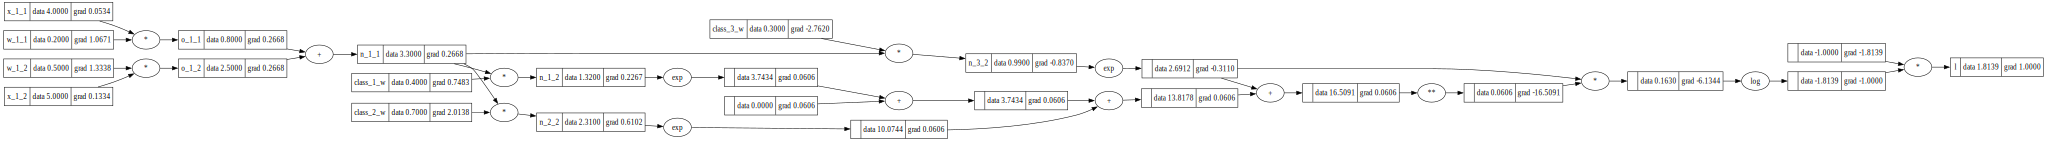

In [8]:
w_1_1 = Value(0.2, label = "w_1_1"); w_1_2 = Value(0.5, label = "w_1_2")
w_2_1 = Value(0.4, label = "class_1_w")
w_2_2 = Value(0.7, label = "class_2_w")
w_2_3 = Value(0.3, label = "class_3_w")

x_1_1 = Value(4, label = "x_1_1"); x_1_2 = Value(5, label = "x_1_2")
y_1 = Value(1, label = "y_1")

o_1_1 = w_1_1*x_1_1; o_1_1.label = "o_1_1"
o_1_2 = w_1_2*x_1_2; o_1_2.label = "o_1_2"

n_1_1 = o_1_1 + o_1_2; n_1_1.label = "n_1_1"
n_1_2 = n_1_1*w_2_1; n_1_2.label = "n_1_2"
n_2_2 = n_1_1*w_2_2; n_2_2.label = "n_2_2"
n_3_2 = n_1_1*w_2_3; n_3_2.label = "n_3_2"

def softmax(logits):
    exp_values = [n.exp() for n in logits]
    denominator = sum([e for e in exp_values])
    probs = [e/denominator for e in exp_values]
    return probs

probs = softmax([n_1_2, n_2_2, n_3_2])
l = -(probs[2].log()); l.label = "l"

l.backward()

draw_dot(l)